In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jan 28 17:55:37 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from enum import Enum
from scipy.linalg import norm
from scipy.special import erfc

In [5]:
from IPython.display import Image 

In [6]:
from dataclasses import dataclass
import abc
from typing import Sequence

from pynext.system_of_units import *
from pynext.graphics import draw_cylinder
from pynext.graphics import draw_sphere
from pynext.graphics import draw_vuv
from pynext.graphics import draw_spherical_sample
from pynext.pynext_types import Cylinder, Sphere
from pynext.pynext_types import FiberWLS
from pynext.pynext_types import WLS
from pynext.pynext_types import SiPM

In [7]:
from pynext.pynext_base import sample_spherical
from pynext.pynext_base import vuv_transport
from pynext.pynext_base import  xyz_from_vuv
from pynext.pynext_base import  vuv_fractions
from pynext.pynext_plot import  display_figure
from pynext.pynext_plot import  display_figures

## Definition of a WLS fiber

### Fiber is coated with WLS (e.g, TPB)

In [11]:
tpb = WLS(name='TPB', qeff=0.65)
tpb

WLS(name='TPB', qeff=0.65)

### define fiber

In [90]:
fwls = FiberWLS(d = 2*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)
fwls


        diameter =2.0 mm, Q = 0.85, PTFE refl = 0.98
        ncore = 1.6, nclad1 =1.49, nclad2 =1.42
        Absoprtion prob at 450 nm     = 0.8906170225195483
        Trapping efficieny            = 0.09837038590604039
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [91]:
fwls.ptir1

0.06875000000000009

In [92]:
fwls.ptir2

0.046979865771812124

In [93]:
fwls.trapping_efficiency

0.09837038590604039

In [81]:
fwls.thetac1/degree

68.63051303142856

In [83]:
np.cos(np.arcsin(1.49/1.6))

0.3643808961787105

In [84]:
np.cos(np.arcsin(1.42/1.49))

0.3029069556079669

In [85]:
np.cos(np.arcsin(1/1.6))

0.7806247497997998

## Linear attenuation coefficient for blue photons

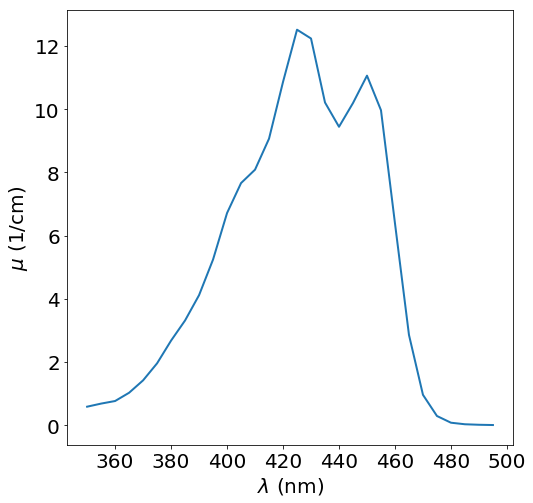

In [17]:
display_figure(fwls.fmu.WL, fwls.fmu.mu, '$\lambda$ (nm)', '$\mu$ (1/cm)', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

In [19]:
fwls1mm = FiberWLS(d = 1*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)
fwls5mm = FiberWLS(d = 5*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)

In [20]:
BA1mm = [fwls1mm.blue_absorption(l * nm) for l in np.arange(360,480)]
BA2mm = [fwls.blue_absorption(l * nm) for l in np.arange(360,480)]
BA5mm = [fwls5mm.blue_absorption(l * nm) for l in np.arange(360,480)]
WL = np.arange(360,480) 

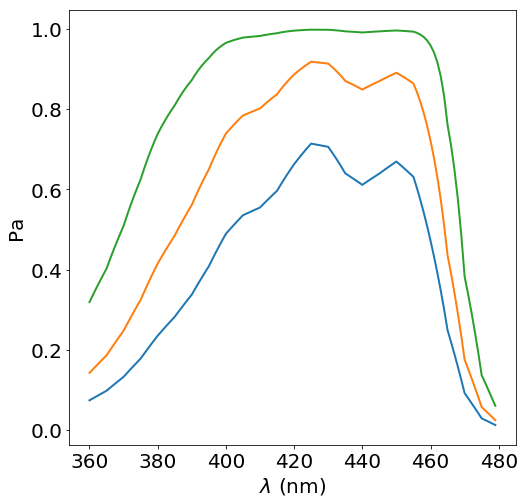

In [21]:
display_figures((WL, WL, WL), (BA1mm, BA2mm, BA5mm), '$\lambda$ (nm)', 'Pa', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

## St. Gobain absorption and emission spectrum

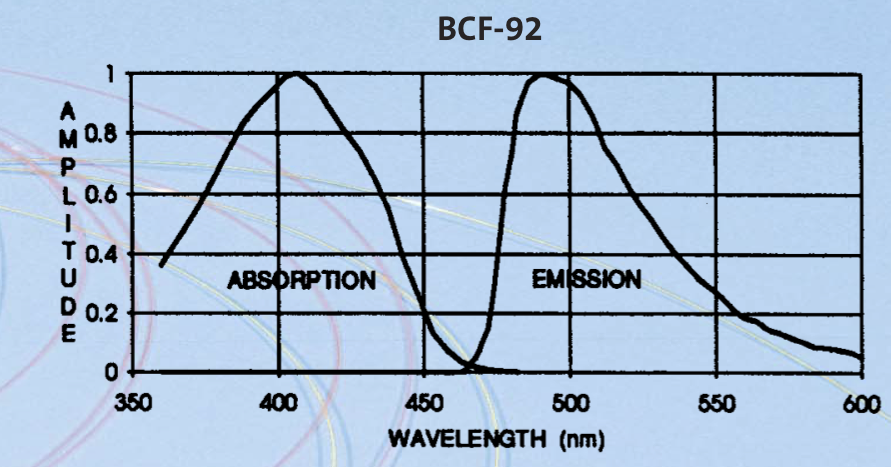

In [22]:
Image(filename = "StGobainAbsEm.png")  

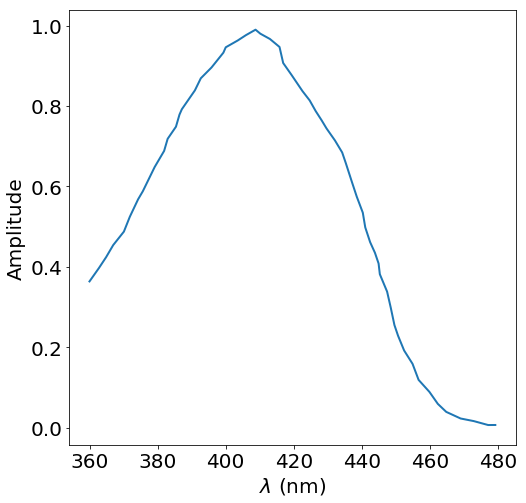

In [23]:
display_figure(fwls.fabs.WL, fwls.fabs.A, '$\lambda$ (nm)', 'Amplitude', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

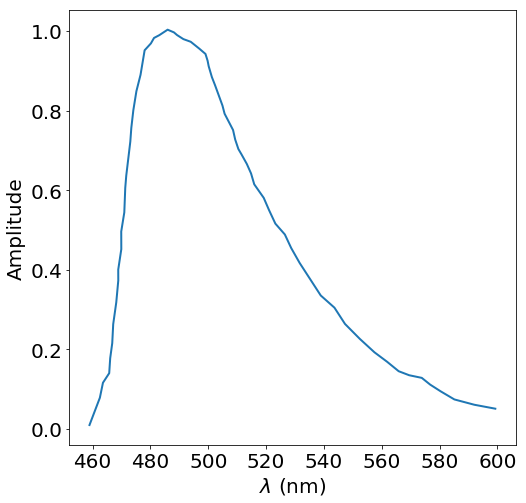

In [24]:
display_figure(fwls.fem.WL, fwls.fem.A, '$\lambda$ (nm)', 'Amplitude', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

## TPB 

In [25]:
L = np.arange(350, 600, 1) * nm

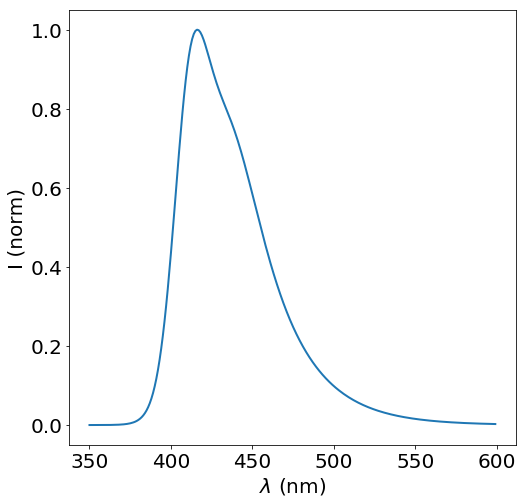

In [26]:
display_figure(L/nm, tpb.emission_tpb(L), '$\lambda$ (nm)', 'I (norm)', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

## All spectra together

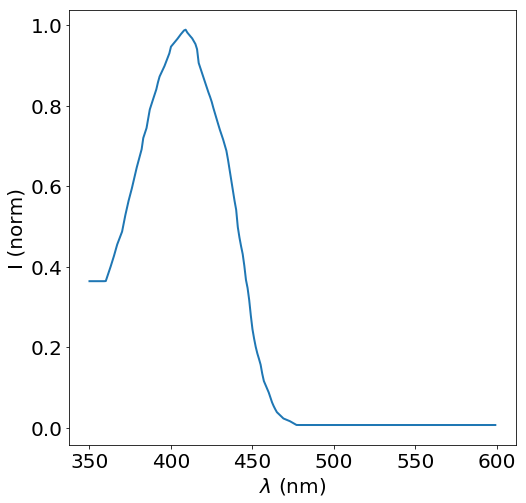

In [27]:
display_figure(L/nm, fwls.wls_absorption(L), '$\lambda$ (nm)', 'I (norm)', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

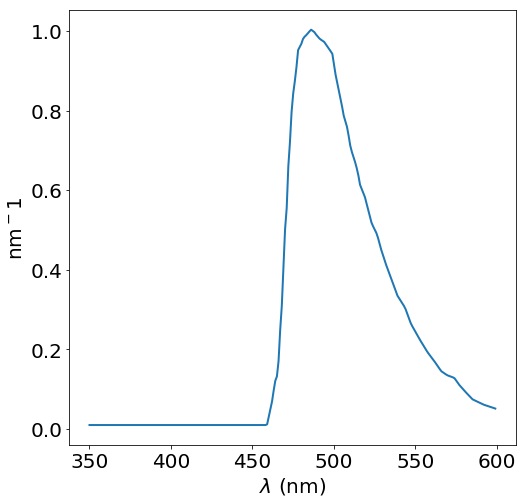

In [28]:
display_figure(L/nm, fwls.wls_emission(L), '$\lambda$ (nm)', 'nm$^-1$', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

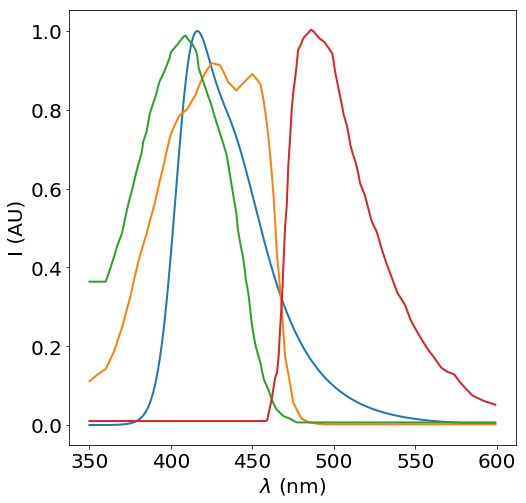

In [29]:
display_figures((L/nm, L/nm, L/nm, L/nm), (tpb.emission_tpb(L), fwls.blue_absorption(L), fwls.wls_absorption(L), fwls.wls_emission(L)), 
                '$\lambda$ (nm)', 'I (AU)', log=False, xlim=None, ylim=None, xl=None, yl=None,
                 lw=2, fontsize=20, figsize=(8,8))

### NB 
- The green spectrum (provided by St. Gobain, but normalised to one) describes the absorption spectrum of the fiber but is normalised to one. 
- The orang spectrum corresponds to the absorption spectrum of Elijan plastics and includes the attenuation length in the fiber. 
- Provisionally we use the Elijan spectrum for the absorption probability. 

## 

## PDE weighted by WLS emission spectrum

In [33]:
s13360 = SiPM(name='s13360', xsize=2*mm, PDE = 0.4, C = 150*pF, Rs=100*ohm)
s13360


        sensor =s13360, size = 2.0 mm, PDE = 0.4
        capacitance = 150.00 pF;
        

In [34]:
L = np.arange(450, 600, 1)

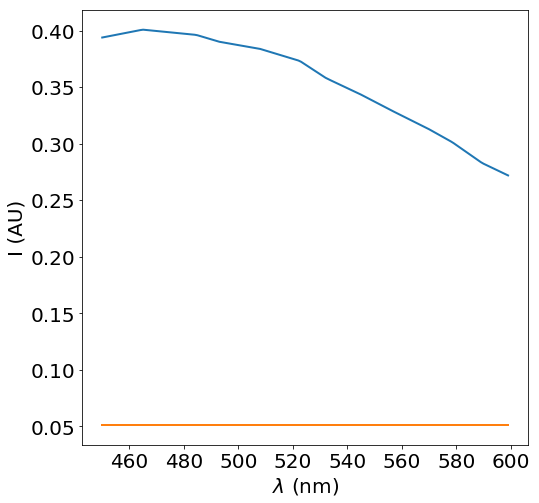

In [35]:
display_figures((L,L), (s13360.pde(L),  fwls.wls_emission(L)), '$\lambda$ (nm)', 'I (AU)', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))

In [36]:
pde = np.sum(s13360.pde(L) * fwls.wls_emission(L)) / np.sum(fwls.wls_emission(L))
print(f' weighted PDE = {pde}') 

 weighted PDE = 0.3558741117203121


## Calculation of total efficiency:

- A first calculation of the efficiency of the fiber detector can be made ignoring the reflection of light in the Teflon, which will be located behing the fibers. Then we have:

$$
\epsilon = \epsilon_t \cdot \epsilon_{TPB} \cdot \epsilon_{TE} \cdot \epsilon_{PDE}
$$

Where:
- $\epsilon$ is the total efficiency, from which we obtain $n_{pe} = \epsilon_t \cdot n_{s1}$, where $n_{pe}$ is the number of photoelectrons and $n_{s1}$ the number of $s_1$ photons.
- $\epsilon_t$ is the transport efficiency, which includes reflections, absorption efficiency, fiber QE and spectra missmatch. $\epsilon_g \sim 0.84$. 
- $\epsilon_{TPB}$ is the TPB WLS efficiency, $\epsilon_{TPB} = 0.65$
- $\epsilon_{TE}$ is the WLS Trapping efficiency, $\epsilon_{TE} \sim 0.1$
- $\epsilon_{PDE}$ is the SiPM PDE, weighted by emission spectrum $\epsilon_{PDE} \sim 0.38$


In [37]:
eff_g = 0.84
eff = eff_g * tpb.quantum_efficiency * fwls.trapping_efficiency 
print(f'Overall efficiency (wihtout SiPM PDE) = {eff}')

Overall efficiency (wihtout SiPM PDE) = 0.053710230704698055


## The case of quartz-Teflon-WLS

In [97]:
fxe = FiberWLS(d = 1*mm, wls = tpb, qfib = 1.00, qptfe=1.00, ncore = 1.6, nclad1 = 1.0, nclad2 = 1.00, latt = 3.5*m)


In [98]:
fxe


        diameter =1.0 mm, Q = 1.0, PTFE refl = 1.0
        ncore = 1.6, nclad1 =1.0, nclad2 =1.0
        Absoprtion prob at 450 nm     = 0.6692690255200586
        Trapping efficieny            = 0.3749999999999999
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [99]:
fxe.trapping_efficiency

0.3749999999999999

In [94]:
fwa = FiberWLS(d = 1*mm, wls = tpb, qfib = 1.0, qptfe=1.00, ncore = 1.5, nclad1 = 1.23, nclad2 = 1.23, latt = 3.5*m)


In [95]:
fwa


        diameter =1.0 mm, Q = 1.0, PTFE refl = 1.0
        ncore = 1.5, nclad1 =1.23, nclad2 =1.23
        Absoprtion prob at 450 nm     = 0.6692690255200586
        Trapping efficieny            = 0.17999999999999994
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [96]:
fwa.trapping_efficiency

0.17999999999999994